### Run the following commands in the terminal before you start
source activate base

cd /Users/lphan/Documents/Spotify/spotify_dashboard

source bin/activate

jupyter lab

In [1]:
import os
os.chdir('/Users/lphan/Documents/Spotify/spotify_dashboard')

In [2]:
# Packages
# For Cleaning and basic functions
import pandas as pd
import numpy as np
import requests
import json

# # Connecting to Spotify API
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials

# For Machine Learning
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#for visualizations and images pulling
from PIL import Image
import requests
from io import BytesIO
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
pn.extension('tabulator')
pn.extension(sizing_mode = 'stretch_width')
import plotly.io as pio
import hvplot.pandas
import holoviews as hv
# df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")
# cache data to improve dashboard performance


In [3]:
#pip install matplotlib
#pip install wordcloud 
#pip install -U scikit-learn

In [4]:
#these are downloaded files from a separate cleaning job that we did
mood = "https://raw.githubusercontent.com/lphan1812/spotify-project/main/data_for_dashboard/mood_data.csv"
user_six_mos = 'https://raw.githubusercontent.com/lphan1812/spotify-project/main/data_for_dashboard/franklin_six_months.csv'
user_audiofeature = 'https://raw.githubusercontent.com/lphan1812/spotify-project/main/data_for_dashboard/franklin_audio_features.csv'
user_genres = "https://raw.githubusercontent.com/lphan1812/spotify-project/main/data_for_dashboard/franklin_6mo_genres.csv"

In [5]:
# audio_genres = pd.merge(user_audiofeature, user_genres[['track_uri','genres']], on='track_uri', how='left')
# audio_genres

In [6]:
mood_data = pd.read_csv(mood)
user_six_mos = pd.read_csv(user_six_mos)
user_features = pd.read_csv(user_audiofeature)
user_genres = pd.read_csv(user_genres)
# singer-songerwriter is not necessarily a genre
user_genres = user_genres[~(user_genres['genres'] == 'singer-songwriter')]


In [7]:
mood_data

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,popularity,album_release_date,vibe
0,0,Miley Cyrus,Flowers,Flowers,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,...,0.000005,0.0322,0.646,117.999,200455,4,0.06320,98,1/13/23,upbeat
1,1,Rema,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,...,0.000669,0.1140,0.802,106.999,239318,4,0.38200,95,8/25/22,upbeat
2,2,David Guetta,I'm Good (Blue),I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,0.561,0.965,7,-3.673,0,...,0.000007,0.3710,0.304,128.040,175238,4,0.00383,94,8/26/22,upbeat
3,3,Stephen Sanchez,Until I Found You (Em Beihold Version),Until I Found You (with Em Beihold) - Em Beiho...,1Y3LN4zO1Edc2EluIoSPJN,0.551,0.550,10,-5.339,1,...,0.000000,0.2020,0.342,101.190,176440,3,0.77700,93,4/22/22,upbeat
4,4,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,0.704,0.797,0,-5.927,1,...,0.000745,0.0546,0.825,139.994,148486,4,0.08260,93,5/13/22,upbeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,2774,Joy Crookes,Don't Let Me Down (Demo),Don't Let Me Down - Demo,1VwPTHAfPvcL1ZubK6qabL,0.696,0.140,9,-11.509,1,...,0.000354,0.1480,0.203,80.831,195535,3,0.81800,54,11/29/18,chill
2775,2775,Lee Fields & The Expressions,My World,Honey Dove,1emxi7e5EWFsJmwSKTuUDH,0.487,0.497,4,-5.776,0,...,0.167000,0.1090,0.195,160.317,246573,4,0.12400,53,6/2/09,chill
2776,2776,Charlotte Day Wilson,ALPHA,Mountains,4JvEicQI7CxOJxuI0xtpim,0.540,0.399,10,-9.127,1,...,0.023900,0.3680,0.141,117.976,249334,4,0.77000,53,7/9/21,chill
2777,2777,Raveena,Shanti,Love Child,7xlhCrF1qme2kFUmynnaQq,0.907,0.338,7,-10.944,1,...,0.032200,0.0418,0.848,95.989,163072,4,0.45400,53,12/6/17,chill


## Train and test models to label mood to the user's playlist

In [8]:
# Drops NAs so it can be put into the sklearn model
mood_data = mood_data.dropna()
user_data = user_features.dropna()

In [9]:
user_data

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo
0,4FFSK1xgCLkTZJLUERLZKG,61,0.712,0.440,-11.566,0.312,0.0413,0.000000,123.958
1,5enxwA8aAbwZbf5qCHORXi,85,0.631,0.518,-8.771,0.205,0.0303,0.000000,93.023
2,0T482F5L30d7ChNbLqsKa7,43,0.414,0.235,-15.252,0.137,0.0429,0.907000,144.467
3,3EZTyh1wJEmreJH1aULPCj,62,0.323,0.106,-10.374,0.158,0.0323,0.000059,91.455
4,5Mw9bXG1dLNhbjofkVS2oR,69,0.262,0.361,-10.187,0.056,0.0333,0.002680,126.786
...,...,...,...,...,...,...,...,...,...
831,2cOUlop2ZakjOKe4WinesN,77,0.735,0.425,-6.648,0.848,0.0464,0.000000,85.896
832,0k6LV1ohcK2hlNPwu1nVw9,63,0.641,0.512,-4.935,0.395,0.0285,0.000000,116.059
833,6yhLR2sVn1IfsScVrR4ocr,60,0.416,0.341,-10.749,0.776,0.0391,0.000000,177.229
834,4pbG9SUmWIvsROVLF0zF9s,74,0.490,0.715,-5.549,0.866,0.0476,0.000000,130.726


### Logistic regression

In [10]:
# subset the relevant columns
mood_features = mood_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]
user_features = user_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]

# scale audio features to standardize the metrics
scaler = preprocessing.MinMaxScaler()
mood_features_scaled = pd.DataFrame(scaler.fit_transform(mood_features), columns=mood_features.columns)
user_features_scaled = pd.DataFrame(scaler.fit_transform(user_features), columns=user_features.columns)

mood_target = mood_data['vibe']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a logistic regression model and train it
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)

# make predictions on the user data
user_pred = logreg.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is:", accuracy)


The accuracy of the model is: 0.7230215827338129


### Random Forest --- Best model

In [11]:
# import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# subset the relevant columns
mood_features = mood_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]
user_features = user_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]

# scale audio features to standardize the metrics
scaler = preprocessing.MinMaxScaler()
mood_features_scaled = pd.DataFrame(scaler.fit_transform(mood_features), columns=mood_features.columns)
user_features_scaled = pd.DataFrame(scaler.fit_transform(user_features), columns=user_features.columns)

mood_target = mood_data['vibe']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a random forest classifier and train it
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the user data
best_user_pred = rfc.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
best_y_pred = rfc.predict(X_test)
best_accuracy = metrics.accuracy_score(y_test, best_y_pred)
print("The accuracy of the model is:", best_accuracy)


The accuracy of the model is: 0.8165467625899281


### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a decision tree classifier model and train it
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# make predictions on the user data
user_pred = dt.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the decision tree model is:", accuracy)


The accuracy of the decision tree model is: 0.7446043165467626


### Neural Networks

In [13]:
from sklearn.neural_network import MLPClassifier

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a neural network classifier model and train it
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
nn.fit(X_train, y_train)

# make predictions on the user data
user_pred = nn.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
y_pred = nn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the neural network model is:", accuracy)


The accuracy of the neural network model is: 0.7859712230215827


In [14]:
### Calculate the proportion of different moods within the user's playlist

total = len(best_user_pred)
upbeat_count = np.count_nonzero(best_user_pred == 'upbeat')
upbeat_per = round((upbeat_count / total) * 100)

sad_count = np.count_nonzero(best_user_pred == 'sad')
sad_per = round((sad_count / total) * 100)

chill_count = np.count_nonzero(best_user_pred == 'chill')
chill_per = round((chill_count / total) * 100)

print("Upbeat percent:", upbeat_per, "%")
print("Sad percent:", sad_per , "%")
print("Chill percent:", chill_per, "%")

print("The accuracy of the model is:", best_accuracy)

Upbeat percent: 24 %
Sad percent: 37 %
Chill percent: 39 %
The accuracy of the model is: 0.8165467625899281


In [15]:
user_data['predicted_mood'] = best_user_pred

In [17]:
# prediction_songs = pd.merge(user_data, time[['master_metadata_track_name','track_uri','master_metadata_album_artist_name']], on = 'track_uri', how = 'left')
# prediction_songs = prediction_songs.drop_duplicates()
# prediction_songs.to_csv('predictions_test.csv')

In [18]:
import numpy as np

mood_categories = ['upbeat', 'sad', 'chill']
total = len(best_user_pred)

for mood_category in mood_categories:
    mood_count = np.count_nonzero(best_user_pred == mood_category)
    mood_per = round((mood_count / total) * 100)
    print(mood_category.capitalize(), "percent:", mood_per, "%")

Upbeat percent: 24 %
Sad percent: 37 %
Chill percent: 39 %


In [20]:
time = pd.read_csv('https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_six_months.csv')
# Convert msPlayed into minutes listened
time = pd.merge(time, user_data, on='track_uri', how='left')
time['Minutes Listened'] = time['ms_played'] / 60000

# Convert End Time (UTC) to End Time (Adj) in the user's time zone
time['End Time (Adj)'] = pd.to_datetime(time['ts'])
time.loc[time['End Time (Adj)'] < '2020-03-08', 'End Time (Adj)'] -= pd.Timedelta(hours=5)
time.loc[(time['End Time (Adj)'] >= '2020-03-08') & (time['End Time (Adj)'] < '2020-11-01'), 'End Time (Adj)'] -= pd.Timedelta(hours=4)
time.loc[time['End Time (Adj)'] >= '2020-11-01', 'End Time (Adj)'] -= pd.Timedelta(hours=5)

# Extract the day of the week from the End Time (Adj) column
time['Day of Week'] = time['End Time (Adj)'].dt.day_name()

In [22]:
franklins_mood = time.groupby(['predicted_mood'])['Minutes Listened'].sum().reset_index()

In [26]:
total_minutes = franklins_mood['Minutes Listened'].sum()

# Calculate the percentage of each mood's minutes per total
franklins_mood['Percentage'] = round((franklins_mood['Minutes Listened'] / total_minutes) * 100)
franklins_mood['Percentage']=franklins_mood['Percentage'].apply(lambda x: int(round(x)))
franklins_mood
upbeat_per = int(franklins_mood.loc[franklins_mood['predicted_mood'] == 'upbeat', 'Percentage'].sum())
# , sad_per, chill_per
sad_per = int(franklins_mood.loc[franklins_mood['predicted_mood'] == 'sad', 'Percentage'].sum())
chill_per = int(franklins_mood.loc[franklins_mood['predicted_mood'] == 'chill', 'Percentage'].sum())

### Get images that represent different moods and assign the appropriate cat to the user's data

In [27]:
## PREDEFINE COLOR CODE USED IN THE DASHBOARD
# the predefined are color provided by Spotiy
pre_defined_bgcolor = '#191414'
# "#d5e7e1"

pre_defined_green ='#1db954'
# '#2d856a'

titlecol ='#ffffff'
darkgray = '#212121'
midgray ='#535353'
lightgray ='#b3b3b3'
pale ='#d5e7e1'

# pre_defined_bgcolor ='#2d856a'
# predefineed_green = "#a2c3d1"

In [28]:

# Define image URLs
upbeat_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/upbeat_img.jpg?raw=true'
sad_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/sad_img.jpg?raw=true'
chill_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/chill_chillupbeat.png?raw=true'
confused_url = 'https://github.com/lphan1812/spotify-project/blob/main/confused_cat.png?raw=true'

# Read images from URLs
response = requests.get(upbeat_image_url)
upbeat_image = Image.open(BytesIO(response.content))

response = requests.get(sad_image_url)
sad_image = Image.open(BytesIO(response.content))

response = requests.get(chill_image_url)
chill_image = Image.open(BytesIO(response.content))

response = requests.get(confused_url)
confused_image = Image.open(BytesIO(response.content))

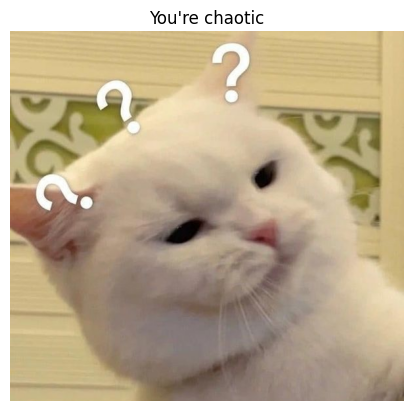

In [30]:
# Find the highest percentage
max_percent = max(upbeat_per, sad_per, chill_per)

style = {'font-family': 'Andale Mono','font-size': '12px', 'color':titlecol}
# Find the highest percentage category
max_per = max(upbeat_per, sad_per, chill_per)
if (upbeat_per < 50 and sad_per <50 and chill_per < 50): 
    image_file = confused_image
    category = 'chaotic'
    punchline = pn.pane.Markdown("# Jeez.. your moods are all over the place. Happy. Chill. Emo. Whatever. Just pick one!",style=style)
    if max_per == upbeat_per:
        narrative = pn.pane.Markdown("# Although you're a confused cat cus you've been having mixed feelings, you did have the upbeat side that was more dominant compared to others.",style=style)
    # if upbeat_per < sad_per and upbeat_per < chill_per :
    #     narrative = pn.pane.Markdown(f"# Although you're a confused cat cus you've been having mixed feelings, your dominant vibes are generally mellow and sad and you enjoyed a good {t_artist}'s song.",style=style)
elif max_per == upbeat_per:
    image_file = upbeat_image
    category = 'upbeat'
    punchline = pn.pane.Markdown("# Let me grab a chair and then you tell me all about the party last night!",style=style)
    narrative = pn.pane.Markdown("# You're an upbeat cat and you like to have fun and enjoy yourselves",style=style)
elif max_per == sad_per:
    image_file = sad_image
    category = 'sad'
    punchline = pn.pane.Markdown("# Ooops.. Is this not the right time? I'll come back once you finish crying!",style=style)
    narrative = pn.pane.Markdown("# You're an sad cat and you like to have fun and enjoy yourselves in the past 6 months.",style=style)
else:
    image_file = chill_image
    category = 'chill'
    punchline = pn.pane.Markdown("# Ah yes, the classic 'I'm so cool, I only listen to lo-fi beats vibe.' It's okay. Same here. We're chillin",style=style)

# Load and display the image
# image = plt.imread(image_file, format = None)
plt.imshow(image_file)
plt.axis('off')
plt.title(f"You're {category}")
plt.show()


In [33]:
punchline

Markdown(str, sizing_mode='stretch_width', style={'font-family': 'Andale Mo...})

# Create visualizations

### Audio Features

In [34]:
my_features = mood_data[['danceability', 'energy', 'loudness','speechiness',
                             'valence', 'tempo', 'popularity']]

music_feature_me = pd.DataFrame(scaler.fit_transform(my_features), columns=my_features.columns)

In [35]:
#allow plotly to show up in jupyter lab
pio.renderers.default = 'iframe'

In [36]:
radarchart = go.Figure(data=go.Scatterpolar(
    r=list(round(music_feature_me.median(),2)),
    theta=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Valence','Tempo','Popularity'],
    fill='toself',
    # fillcolor = '#1ed760',
    line=dict(color=pre_defined_green)
))

# Update chart layout
radarchart.update_layout(
    polar=dict(
        bgcolor=pre_defined_bgcolor,
        radialaxis=dict(
            visible=True,
            range=[0,1],
            gridcolor = lightgray,
            tickfont=dict(color=pre_defined_green)
        )),
    showlegend=False,
        title={
        'text': "YOUR AUDIO FEATURES", 
        'x': 0.5, 
        'y': 0.98, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
    margin=dict(l=0, r=0, t=60, b=0),
    font=dict(size=14, color=titlecol),
    # plot_bgcolor='#191414',
    paper_bgcolor=pre_defined_bgcolor
)

radarchart.show()


In [37]:

num_popular_songs = sum(1 for score in my_features['popularity'] if score > 60)
percent_popular_songs = num_popular_songs / len(my_features['popularity']) * 100
print(f"Percentage of popular songs: {percent_popular_songs:.2f}%")

Percentage of popular songs: 65.82%


In [38]:
popularity = pd.DataFrame()
popularity['popularity'] = my_features['popularity']
popularity['popularity_label'] = my_features['popularity'].apply(lambda x: 'Basic' if x >= 60 else 'Lowkey')

In [39]:
text = pn.pane.Markdown("<div style='text-align: center;'>..what's more</div>",style={'font-family': 'Andale Mono', 'font-size': '25px', 'color':titlecol})

In [41]:
if percent_popular_songs >=60:
    basicness = "AND OH.. YA BASIC!"
else:
    basicness = "Huh.. YOU'RE PRETTY LOWKEY"
    
basic_gauge = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = percent_popular_songs,
        gauge = {
        'axis': {'range': [None, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': pre_defined_green},
        'bgcolor': titlecol,
        'borderwidth': 1},number={'suffix': "% POPULAR"},
    domain = {'x': [0, 1], 'y': [0, 1]},
        title={
        'text': "  "+ basicness,   
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':18}}
            ))
basic_gauge.update_layout(paper_bgcolor = pre_defined_bgcolor, font = {'color': pre_defined_green,'family': 'Andale Mono', 'size':18}
                          ,height=300,
                        width = 300
                          ,margin = dict(l=30,r=50,t=0,b=0)
                         )

# fig.show()
basic_gauge.show()

## Genres

In [42]:
plotly_template = pn.widgets.Select(options=sorted(pio.templates))

In [43]:
# group the DataFrame by the 'fruit' column and count the number of occurrences of each fruit
freq = user_six_mos.groupby('master_metadata_album_artist_name').size().reset_index(name='count').sort_values('count',ascending=False)
freq_top = freq.head(40)
# convert the 'freq' DataFrame to a dictionary to use as input to the WordCloud object
freq_dict = dict(zip(freq_top['master_metadata_album_artist_name'], freq_top['count']))


In [44]:
# freq2 = user_six_mos.groupby('master_metadata_album_artist_name').size().reset_index(name='count').sort_values('count',ascending=False)
for i in range(10):
    if 'Taylor Swift' in freq_top.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "We got ourself a SWIFTIE"
        t_artist = freq_top.iloc[i]['master_metadata_album_artist_name']
    elif 'SZA' in freq_top.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "LMAO SZA"
        t_artist = freq_top.iloc[i]['master_metadata_album_artist_name']
    elif 'Nicki Minaj' in freq_top.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "Are you a Nicki Fan?..am I a Nicki Fan?..pull up in the Sri Lanka whattt"
        t_artist = freq_top.iloc[i]['master_metadata_album_artist_name']
        break
    elif i==0:
        top_artist = str(freq_top.iloc[i]["master_metadata_album_artist_name"])
        t_artist = freq_top.iloc[i]['master_metadata_album_artist_name']
        # print(artist)
# artist_titles 

In [45]:
t_artist

'Taylor Swift'

In [50]:
# create a WordCloud object with relative scaling set to 0
wordcloud = WordCloud(width=1000, height=500, relative_scaling=0,colormap='Greens',background_color=pre_defined_bgcolor).generate_from_frequencies(freq_dict)
# convert the WordCloud object into an image that can be plotted in Plotly
img = wordcloud.to_image()

# create a Plotly figure and add the word cloud image to it
artist_chart = px.imshow(img)
artist_chart.update_layout(
    title={
        'text': "'"+top_artist+"'",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}},
        # title_font_color='black',
    margin={'l': 0, 'r': 0, 'b': 0, 't': 60},
    xaxis=dict(visible=False),
    yaxis = dict(visible=False))

# show the Plotly figure
artist_chart.update_layout(paper_bgcolor=pre_defined_bgcolor)
artist_chart.show()

## Day of week

In [51]:
time = pd.read_csv('https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_six_months.csv')
# Convert msPlayed into minutes listened
time = pd.merge(time, user_data, on='track_uri', how='left')
time['Minutes Listened'] = time['ms_played'] / 60000

# Convert End Time (UTC) to End Time (Adj) in the user's time zone
time['End Time (Adj)'] = pd.to_datetime(time['ts'])
time.loc[time['End Time (Adj)'] < '2020-03-08', 'End Time (Adj)'] -= pd.Timedelta(hours=5)
time.loc[(time['End Time (Adj)'] >= '2020-03-08') & (time['End Time (Adj)'] < '2020-11-01'), 'End Time (Adj)'] -= pd.Timedelta(hours=4)
time.loc[time['End Time (Adj)'] >= '2020-11-01', 'End Time (Adj)'] -= pd.Timedelta(hours=5)

# Extract the day of the week from the End Time (Adj) column
time['Day of Week'] = time['End Time (Adj)'].dt.day_name()



In [52]:
# Group the data by day of week and predicted mood, and calculate the total minutes for each group
day_mood_minutes = time.groupby(['Day of Week', 'predicted_mood'])['Minutes Listened'].sum().reset_index()

# calculate the total minutes per day of week
total_minutes_per_day = day_mood_minutes.groupby('Day of Week')['Minutes Listened'].sum().reset_index()

# calculate the percentage of mood on each day of week
day_mood_minutes = day_mood_minutes.merge(total_minutes_per_day, on='Day of Week', suffixes=('', '_total'))
day_mood_minutes['mood_percentage'] = day_mood_minutes['Minutes Listened'] / day_mood_minutes['Minutes Listened_total'] * 100


In [54]:
# Create a stacked bar chart to visualize the results
dayofweek = px.bar(day_mood_minutes, x='Day of Week', y='Minutes Listened', color='predicted_mood', 
                     category_orders={'Day of Week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']}, 
                     barmode='stack',
                     text=day_mood_minutes['mood_percentage'].round(1).astype(str) + '%',
                    
                     # text = round(day_mood_minutes[''],0).astype(str) + '%' ,
             color_discrete_map={
                            'chill': titlecol,
                            'upbeat': pre_defined_green,
                            'sad': lightgray
                        }
)
dayofweek.update_layout(
    title={
        'text': "MUSIC USAGE AND MOOD THROUGHOUT THE WEEK", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': 'white','family': 'Andale Mono', 'size':25}
    },
        xaxis_title="Day of Week", 
    yaxis_title="Minutes",
    # showlegend=False,
    plot_bgcolor=pre_defined_bgcolor,
    paper_bgcolor=pre_defined_bgcolor,
    font_color=titlecol,
    yaxis_gridcolor=midgray,legend=dict(
        title = "",
        orientation='h',
        yanchor='bottom',
        y=0.92,
        xanchor='center',
        x=0.5
    # color_discrete_sequence=[titlecol, pre_defined_green, lightgray]
))

# stacked_bar.update_xaxes(range=[0, 100], showgrid=False, showticklabels=False)
# stacked_bar.update_yaxes(showticklabels=False, showgrid=False)

# stacked_bar.update_layout(legend=dict(yanchor="bottom", y=0.99,  x=0.01))

dayofweek.show()


In [55]:
# Filter the rows where skipped is True and group by track name
skipped_tracks = time[time['skipped'] == True].groupby('master_metadata_track_name').count()

# Sort by the number of skips in descending order and select the top 10
top_skipped_tracks = skipped_tracks.sort_values(by='skipped', ascending=True).tail(10)

# Plot the top 10 skipped tracks using a horizontal bar chart
skip = px.bar(top_skipped_tracks, x='skipped', y=top_skipped_tracks.index, orientation='h', color_discrete_sequence=[pre_defined_green])
# Update the chart layout to remove the y-axis title
skip.update_layout(yaxis_title='',
                    xaxis_title = "# of Times Skipped",
                      title={
        'text': "You must be SICK of these songs..", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  xaxis_gridcolor=darkgray
)
skip.show()


In [56]:
track_list_ms = time.groupby(['master_metadata_track_name'],as_index=False).sum('ms_played').sort_values('ms_played',ascending = False)

#track_list_ms = pd.merge(track_list_ms, time[['master_metadata_track_name', 'master_metadata_album_artist_name','album','track_uri']].drop_duplicates(),how='inner',on=['track_uri'])

track_list_ms['minutes'] = round(track_list_ms['ms_played']/60000,1)
track_list_ms['hours'] = round(track_list_ms['minutes']/60,1)

### most played songs
top_10_tracks = track_list_ms.head(10)
top_10_tracks
#top_10_tracks[['trackName','artistName','msPlayed','minutes','hours']]

# Sort the DataFrame by the 'minutes' column in descending order
top_10_tracks = top_10_tracks.sort_values(by="minutes", ascending=True)

tracks = px.bar(top_10_tracks, x="minutes", y="master_metadata_track_name", orientation="h", color_discrete_sequence=[pre_defined_green])

# Set the chart title and axis labels
tracks.update_layout(
    title={
        'text': "TOP TRACKS", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
    xaxis_title="Minutes Played",
    yaxis_title="",
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  xaxis_gridcolor=darkgray
)
tracks.show()

In [57]:
genre = pd.read_csv("https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_6mo_genres.csv")
genre
top_genres = genre.groupby('genres').size().reset_index(name='count').sort_values('count',ascending=False)
top_genres = top_genres.loc[top_genres['genres'] != 'singer-songwriter']

top_genres_10=top_genres.sort_values(by="count", ascending=True).tail(10)

genres = px.bar(top_genres_10, x='count', y='genres',orientation="h", color_discrete_sequence=[pre_defined_green])
# genres.update_layout(
#                 title={
#                         'text': "TOP GENRES", 
#                         'x': 0.5, 
#                         'y': 0.95, 
#                         'xanchor': 'center',
#                         'yanchor': 'top',
#                         'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
#                     },
#                   xaxis_title="",
#                   yaxis_title="",
#                   plot_bgcolor=pre_defined_bgcolor,
#                   paper_bgcolor=pre_defined_bgcolor,
#                   font_color=titlecol,
#                   yaxis_gridcolor=midgray
# )
genres.update_layout(
    title={
        'text': "TOP GENRES", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
    xaxis_title="Minutes Played",
    yaxis_title="",
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  xaxis_gridcolor=darkgray
)
# tracks.show()
genres.show()

## Narative

# About the authors

In [58]:
barb_and_linh = pd.read_csv('barblinh.csv')

### Get vibe for barb and linh

In [59]:
# subset the relevant columns
mood_features = mood_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]
authors_features = barb_and_linh[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]

# scale audio features to standardize the metrics
scaler = preprocessing.MinMaxScaler()
mood_features_scaled = pd.DataFrame(scaler.fit_transform(mood_features), columns=mood_features.columns)
authors_features_scaled = pd.DataFrame(scaler.fit_transform(authors_features), columns=authors_features.columns)

mood_target = mood_data['vibe']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a random forest classifier and train it
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the user data
authorsbest_user_pred = rfc.predict(authors_features_scaled)

# calculate the accuracy of the model on the test set
authorsbest_y_pred = rfc.predict(X_test)
authorsbest_accuracy = metrics.accuracy_score(y_test, authorsbest_y_pred)
print("The accuracy of the model is:", authorsbest_accuracy)

The accuracy of the model is: 0.8165467625899281


In [60]:
barb_and_linh['predicted_mood']=authorsbest_user_pred

In [61]:
### Calculate the proportion of different moods within the user's playlist

authorstotal = len(authorsbest_user_pred)
authorsupbeat_count = np.count_nonzero(authorsbest_user_pred == 'upbeat')
authorsupbeat_per = round((authorsupbeat_count / authorstotal) * 100)

authorssad_count = np.count_nonzero(authorsbest_user_pred == 'sad')
authorssad_per = round((authorssad_count / authorstotal) * 100)

authorschill_count = np.count_nonzero(authorsbest_user_pred == 'chill')
authorschill_per = round((authorschill_count / authorstotal) * 100)

print("Upbeat percent:", authorsupbeat_per, "%")
print("Sad percent:", authorssad_per , "%")
print("Chill percent:", authorschill_per, "%")

print("The accuracy of the model is:", authorsbest_accuracy)

Upbeat percent: 32 %
Sad percent: 15 %
Chill percent: 53 %
The accuracy of the model is: 0.8165467625899281


In [63]:
authors_mood = barb_and_linh.groupby(['predicted_mood','owner']).size().reset_index(name='count').sort_values('count',ascending=False)
authors_mood

,predicted_mood,owner,count
1,chill,Linh,185
0,chill,Barb,144
4,upbeat,Barb,123
3,sad,Linh,78
5,upbeat,Linh,74
2,sad,Barb,13


In [64]:
authors_mood = barb_and_linh.groupby(['predicted_mood','owner']).size().reset_index(name='count').sort_values('count',ascending=False)

In [43]:
# authors_mood = barb_and_linh.groupby(['predicted_mood','owner']).size().reset_index(name='count').sort_values('count',ascending=False)

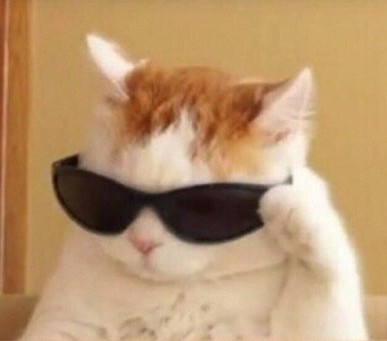

In [65]:
# Find the highest percentage
authorsmax_percent = max(authorsupbeat_per, authorssad_per, authorschill_per)

style = {'font-family': 'Andale Mono','font-size': '10px'}
# Find the highest percentage category
authorsmax_per = max(authorsupbeat_per, authorssad_per, authorschill_per)
if (authorsupbeat_per < 50 and authorssad_per <50 and authorschill_per < 50): 
    authorsimage_file = confused_image
    authorscategory = 'chaotic'
    authorspunchline = pn.pane.Markdown("# Jeez.. your moods are all over the place. Happy. Chill. Emo. Whatever. Just pick one!",style=style)
    
elif authorsmax_per == authorsupbeat_per:
    authorsimage_file = upbeat_image
    authorscategory = 'upbeat'
    authorspunchline = pn.pane.Markdown("# Congratulations, you're not depressed!!!",style=style)
elif authorsmax_per == authorssad_per:
    authorsimage_file = sad_image
    authorscategory = 'sad'
    authorspunchline = pn.pane.Markdown("# LMAO who hurt you?",style=style)
else:
    authorsimage_file = chill_image
    authorscategory = 'chill'
    authorspunchline = pn.pane.Markdown("# Ah yes, the classic 'I'm so cool, I only listen to lo-fi beats vibe.' It's okay. Same here. We're chillin!",style=style)

authorsimage_file

In [66]:
authorspunchline

Markdown(str, sizing_mode='stretch_width', style={'font-family': 'Andale Mo...})

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Combine friend's and your listening data into a single data frame
combined_data = pd.concat([user_data, barb_and_linh])

# Normalize the audio features
scaler = StandardScaler()
# normalized_data = pd.DataFrame(scaler.fit_transform(combined_data.iloc[:, 1:]), columns=combined_data.columns[1:])
scaled_features = combined_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]
# user_features = user_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]

# scale audio features to standardize the metrics
scaler = preprocessing.MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(scaled_features), columns=scaled_features.columns)
# user_features_scaled = pd.DataFrame(scaler.fit_transform(user_features), columns=user_features.columns)

similarity_matrix = cosine_similarity(normalized_data)

# Get the similarity score between your friend and you
friend_index = 0  # Index of your friend's listening data in the combined data frame
your_index = 1    # Index of your listening data in the combined data frame
similarity_score = similarity_matrix[friend_index, your_index]

print("Similarity score between your friend and you:", similarity_score)


Similarity score between your friend and you: 0.9733398809223068


In [68]:

energy_franklin_mean = user_data['energy'].mean()
energy_barb_and_linh_mean = barb_and_linh['energy'].mean()
energy_match = round((energy_franklin_mean / energy_barb_and_linh_mean) * 100)

if energy_match > 100:
    energy_match = 100
    
popularity_franklin_mean = user_data['popularity'].mean()
popularity_barb_and_linh_mean = barb_and_linh['popularity'].mean()
popularity_match = round((popularity_franklin_mean / popularity_barb_and_linh_mean) * 100)

if popularity_match > 100:
    popularity_match = 100

match = pd.DataFrame({'Energy': [f'{energy_match}%'], 'Basicness': [f'{popularity_match}%']})

match

,Energy,Basicness
0,75%,100%


In [70]:
# mport panel as pn
energy = f'{energy_match}%'
popularity = f'{popularity_match}%'

# Create a Panel Markdown with different text fonts
markdown_content = f"""
<span style="font-family: Andale Mono; font-size: 20px; color: #ffffff;">But most importantly, how compatible are you to Barb and Linh? 

<span style="font-family: Andale Mono; font-size: 30px; color: #1DB954;">{energy}<span style="font-family: Andale Mono; font-size: 15px; color: #ffffff;"> matched our energy</span>
<span style="font-family:  Andale Mono; font-size: 30px; color: #1DB954;">{popularity}<span style="font-family: Andale Mono; font-size: 15px; color: #ffffff;"> matched our basicness</span>

"""

# Create a Panel layout with the Markdown
matching = pn.Column(
    pn.pane.Markdown(markdown_content, style={'white-space': 'pre-wrap'})
)

# Display the layout
# matching.show()

## Song Recommendations

In [71]:
# define a function to get the Spotify link for a track URI
def get_spotify_link(df, track_uri_column='track_uri', spotify_link_column='spotify_link'):
    df[spotify_link_column] = 'https://open.spotify.com/track/' + df[track_uri_column] + "/"
    return df
barb_and_linh = get_spotify_link(barb_and_linh).iloc[:,1:]

In [72]:
dummy_moods_user = pd.get_dummies(user_data['predicted_mood']).astype(int)
user_dummy = pd.concat([user_data, dummy_moods_user], axis=1)

user_dummy.head()

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo,predicted_mood,chill,sad,upbeat
0,4FFSK1xgCLkTZJLUERLZKG,61,0.712,0.440,-11.566,0.312,0.0413,0.000000,123.958,chill,1,0,0
1,5enxwA8aAbwZbf5qCHORXi,85,0.631,0.518,-8.771,0.205,0.0303,0.000000,93.023,upbeat,0,0,1
2,0T482F5L30d7ChNbLqsKa7,43,0.414,0.235,-15.252,0.137,0.0429,0.907000,144.467,sad,0,1,0
3,3EZTyh1wJEmreJH1aULPCj,62,0.323,0.106,-10.374,0.158,0.0323,0.000059,91.455,sad,0,1,0
4,5Mw9bXG1dLNhbjofkVS2oR,69,0.262,0.361,-10.187,0.056,0.0333,0.002680,126.786,sad,0,1,0


In [73]:
dummy_moods = pd.get_dummies(barb_and_linh['predicted_mood']).astype(int)
our_dummies = pd.concat([barb_and_linh, dummy_moods], axis=1)
our_dummies.head()
# # Dropping the original 'mood' column
# data_with_dummies.drop('predicted_mood', axis=1, inplace=True)

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo,album,trackName,owner,acousticness,genres,artist_uri,predicted_mood,spotify_link,chill,sad,upbeat
0,1nM9BUwYIkDbLABWUHjNZH,28,0.490,0.913,-4.004,0.240,0.0468,0.000049,112.137,ATTENTION: MILEY LIVE,Like a Prayer - Live,Barb,NaN,NaN,NaN,chill,https://open.spotify.com/track/1nM9BUwYIkDbLAB...,1,0,0
1,4dFKEyGrwmIimMqwYleFOR,64,0.880,0.777,-4.465,0.880,0.2560,0.000000,132.982,Super Freaky Girl,Super Freaky Girl (with JT & BIA feat. Katie G...,Barb,NaN,NaN,NaN,upbeat,https://open.spotify.com/track/4dFKEyGrwmIimMq...,0,0,1
2,65pVi11JqwSZqUuYAqLP36,56,0.718,0.890,-3.798,0.741,0.0553,0.000000,111.967,"HELLO Chapter 1: Hello, Stranger",Movie Star,Barb,NaN,NaN,NaN,chill,https://open.spotify.com/track/65pVi11JqwSZqUu...,1,0,0
3,45eY7Qi2PDUs8WJEhjGWdN,72,0.808,0.661,-6.237,0.804,0.0395,0.000000,107.992,Ramenez la coupe à la maison,Ramenez la coupe à la maison,Barb,NaN,NaN,NaN,upbeat,https://open.spotify.com/track/45eY7Qi2PDUs8WJ...,0,0,1
4,0j55p8YRAPG8yajtNyjt6A,68,0.690,0.621,-3.583,0.497,0.0600,0.000028,66.858,Hold You,Hold You - Hold Yuh,Barb,NaN,NaN,NaN,chill,https://open.spotify.com/track/0j55p8YRAPG8yaj...,1,0,0


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# select the columns you want to use for similarity calculation
cols_to_use = ['popularity', 'danceability', 'energy', 'loudness', 'valence', 'speechiness', 'instrumentalness', 'tempo','chill','upbeat','sad']

# calculate cosine similarity between your friend's data and your data
similarity_matrix = cosine_similarity(user_dummy[cols_to_use], our_dummies[cols_to_use])

# find the most similar tracks between your friend's data and your data
most_similar_tracks = similarity_matrix.argmax(axis=1)

# get the track names and Spotify URLs for the most similar tracks
recommendations = our_dummies.loc[most_similar_tracks, ['trackName', 'spotify_link']]
recommendations.reset_index(drop=True, inplace=True)

# print the top 3 recommendations
top_3_recommendations = recommendations
top_3_recommendations.index += 1  # Start index from 1 instead of 0

# print the top 3 recommendations with their Spotify URLs
# print("Here are three song recommendations that match your taste from Barb and Linh:\n")
# print(top_3_recommendations)

top_3_recommendations.head()

,trackName,spotify_link
1,Happy Ending,https://open.spotify.com/track/1wl3u4FrzcuBv2L...
2,The Joker,https://open.spotify.com/track/1bp2IO61zbQrbWN...
3,Phiến Lá Tĩnh Lặng,https://open.spotify.com/track/69EwGs863aPS8ol...
4,Thanh Xuan,https://open.spotify.com/track/3b34161QoxLwsqh...
5,Dịu Dàng Em Đến,https://open.spotify.com/track/63q4o5Nh1ykbhdo...


In [75]:
mood_dummy = pd.get_dummies(mood_data['vibe']).astype(int).dropna()
mood_dummies = pd.concat([mood_data, mood_dummy], axis=1)

cols_to_use = ['popularity', 'danceability', 'energy', 'loudness', 'valence', 'speechiness', 'instrumentalness', 'tempo','chill','upbeat','sad']

# calculate cosine similarity between your friend's data and your data
similarity_matrix = cosine_similarity(user_dummy[cols_to_use], mood_dummies[cols_to_use].dropna())

# find the most similar tracks between your friend's data and your data
most_similar_tracks = similarity_matrix.argmax(axis=1)

# get the track names and Spotify URLs for the most similar tracks
recommendations = mood_dummies.loc[most_similar_tracks, ['track_name', 'artist', 'vibe','track_id']]
recommendations['similarity_score'] = similarity_matrix.max(axis=1)

recommendations.reset_index(drop=True, inplace=True)
recommendations = recommendations[~recommendations['track_id'].isin(user_dummy['track_uri'])]

# Sort the recommendations by descending similarity scores
recommendations = recommendations.sort_values('similarity_score', ascending=False)

recommendations.reset_index(drop=True, inplace=True)


In [76]:
recommendations =get_spotify_link(recommendations,track_uri_column = 'track_id').iloc[:,:]

In [77]:
recommendations

,track_name,artist,vibe,track_id,similarity_score,spotify_link
0,CAN'T STOP THE FEELING! (from DreamWorks Anima...,Trolls,upbeat,1WkMMavIMc4JZ8cfMmxHkI,1.000000,https://open.spotify.com/track/1WkMMavIMc4JZ8c...
1,Hope Is A Heartache,LÉON,sad,3w1P8nwsVi9vxrGvxYLzAC,0.999999,https://open.spotify.com/track/3w1P8nwsVi9vxrG...
2,You & I (with Zack Tabudlo),Diego Gonzalez,chill,2YZRBM2w68HXHgbKaRTlyw,0.999999,https://open.spotify.com/track/2YZRBM2w68HXHgb...
3,I Can't Swim,Ashley Kutcher,chill,3T7yCHl6ovJaQHsSKQSgVm,0.999999,https://open.spotify.com/track/3T7yCHl6ovJaQHs...
4,We Can't Stop,Miley Cyrus,upbeat,2y4lAQpi5VTNLu2ldeTdUH,0.999999,https://open.spotify.com/track/2y4lAQpi5VTNLu2...
...,...,...,...,...,...,...
706,High Time,Randy Houser,chill,2k3XVSB5S7teKwdOCZ6E99,0.999631,https://open.spotify.com/track/2k3XVSB5S7teKwd...
707,Element,Pop Smoke,upbeat,57BGVV6wcyhbn3hsjlqEZB,0.999611,https://open.spotify.com/track/57BGVV6wcyhbn3h...
708,Falling In Love With Love,Drew Milner,chill,22KchPj2ebXOCwdvK4azrZ,0.999536,https://open.spotify.com/track/22KchPj2ebXOCwd...
709,Koto - piano room,Hideyuki Hashimoto,chill,48Jivh6jAj87eK6lj3FtUo,0.999393,https://open.spotify.com/track/48Jivh6jAj87eK6...


## Refreshable

In [88]:
# table = pn.widgets.DataFrame(
#     recommendations[['artist', 'track_name','vibe','spotify_link']].iloc[5:10],
#     # value=recommendations.head(5),
#     index=False,
#     # columns=['track_name', 'artist', 'track_id'],
#     show_index = False,
#     style = style,
#     escape=False
#     # width=600,
#     # height=300
# )


# # Create a callback function for the refresh button
# def refresh_table(event):
#     global recommendations
#     layout.clear()
#     recommendations = recommendations.iloc[10:]  # Get the next 5 songs
#     table.value = recommendations[['artist', 'track_name','vibe','spotify_link']].iloc[5:10]     # Update the table with the new songs

# # Create a refresh button and link it to the callback function
# refresh_button = pn.widgets.Button(name='Refresh')
# refresh_button.on_click(refresh_table)

# # Create a Panel layout to display the table and refresh button
# refreshable = pn.Column(
#     table,
#     refresh_button
# )

# # Display the layout
# refreshable.show()


## Adding everything to Dashboard

In [89]:
spotify_logo = "https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Green.png"

In [90]:
spotify_logo_black = 'https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Black.png'

### Sidebar content

In [91]:
vibes = ['Chill', 'Upbeat', 'Sad']
values = [chill_per, upbeat_per, sad_per]

vibe_df = pd.DataFrame({'Vibe': vibes, 'Value': values}).sort_values(by='Value', ascending = False)
vibe_df['x']="Vibe"
vibe_df

,Vibe,Value,x
2,Sad,43,Vibe
0,Chill,34,Vibe
1,Upbeat,23,Vibe


In [92]:
franklins_mood['x']='vibe'

In [93]:
franklins_mood=franklins_mood.sort_values(by='Percentage', ascending = False)

In [94]:

# vibe_df = px.data.tips()
vibe_breakdown = px.bar(franklins_mood, x="Percentage", y="x", color='predicted_mood', orientation='h',
             
             # hover_data=["tip", "size"],
             height=150,
                        width = 300,
             # title='Your Vibe',
            barmode='stack',
             color_discrete_map={
                            'chill': titlecol,
                            'upbeat': pre_defined_green,
                            'sad': lightgray
                        },text=franklins_mood['Percentage'].astype(str) + '%' + " " + franklins_mood['predicted_mood'].astype(str)
                        # ,
            )
# vibe_breakdown.update_layout(legend=dict(        title='Your Vibe Breakdown',
#         title_font=dict(color=pre_defined_green),
        # font=dict(color=pre_defined_green),orientation='h', yanchor='top', y=1.02, xanchor='right', x=1))
vibe_breakdown.update_layout(
    paper_bgcolor=pre_defined_bgcolor, margin = dict(l=0,r=5,t=60,b=0),
    xaxis_title="", 
    yaxis_title="",
    showlegend=False,
    plot_bgcolor=pre_defined_bgcolor,
    title={
        'text': "You're..", 
        'x': 0.5, 
        'y': 0.8, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
)

vibe_breakdown.update_xaxes(range=[0, 100], showgrid=False, showticklabels=False)
vibe_breakdown.update_yaxes(showticklabels=False, showgrid=False)
vibe_breakdown.update_traces(
    marker=dict(line=dict(color=lightgray, width=2)),
    textposition='inside', 
    textfont=dict(color=darkgray, size=20)
)

vibe_breakdown.show()

In [95]:
##Create a widget to have 2 charts in 1 space

radio_button = pn.widgets.RadioButtonGroup(options=['THE TRACKS', 'THE GENRES','THE UGH..'], button_type='success', style = {'font-family': 'Andale Mono', 'font-size': '25px', 'color': '#ffffff'})

# Define callback functions
def on_click_button(event):
    if event.new == 'THE TRACKS':
        chart_panel.object = tracks
    elif event.new == 'THE GENRES':
        chart_panel.object = genres
    else:
        chart_panel.object = skip

# Define chart panels
chart_panel = pn.panel(tracks)

# Assign callbacks to widgets
radio_button.param.watch(on_click_button, 'value')


Watcher(inst=RadioButtonGroup(button_type='success', options=['THE TRACKS', ...], sizing_mode='stretch_width', value='THE TRACKS'), cls=<class 'panel.widgets.select.RadioButtonGroup'>, fn=<function on_click_button at 0x7f8844798e50>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [96]:
radio_button

RadioButtonGroup(button_type='success', options=['THE TRACKS', ...], sizing_mode='stretch_width', value='THE TRACKS')

In [97]:
style

{'font-family': 'Andale Mono', 'font-size': '10px'}

## Recommendation button

In [98]:
recommendations['SPOTIFY LINK']="<a href='" + recommendations["spotify_link"] + "' target='_blank'>" + recommendations["track_name"] + "</a>"

# table2 = pn.pane.DataFrame(
#     recommendations[['artist', 'track_name','vibe','Spotify Link']].head(5),
#     # value=recommendations.head(5),
#     index=False,
#     columns=['Artist', 'Track', 'Mood', 'Spotify Link'],
#     show_index = False,
#     style = {'font-family': 'Andale Mono', 'font-size': '20px' ,'font-weight': 'bold' },
#     escape=False,
#     # sizing_mode ='stretch_both'
# )


# # Create a callback function for the refresh button
# def refresh_table(event):
#     global recommendations
#     layout.clear()
#     recommendations = recommendations.iloc[6:]  # Get the next 5 songs
#     table2.value = recommendations[['artist', 'track_name','vibe','Spotify Link']].head(5)     # Update the table with the new songs

# # Create a refresh button and link it to the callback function
# refresh_button = pn.widgets.Button(name='Refresh')
# refresh_button.on_click(refresh_table)

# # Create a Panel layout to display the table and refresh button
# clickable = pn.Column(
#     # pn.pane.HTML(css, width=0, height=0),
#     # pn.pane.Markdown("f since style={'font-size': '12px', 'font-family': 'Arial', 'color': 'white', 'background-color': 'black'}
#     table2,
#     refresh_button
# )

# # Display the layout
# # clickable.show()
# clickable.show()

In [99]:
recommendations

,track_name,artist,vibe,track_id,similarity_score,spotify_link,SPOTIFY LINK
0,CAN'T STOP THE FEELING! (from DreamWorks Anima...,Trolls,upbeat,1WkMMavIMc4JZ8cfMmxHkI,1.000000,https://open.spotify.com/track/1WkMMavIMc4JZ8c...,<a href='https://open.spotify.com/track/1WkMMa...
1,Hope Is A Heartache,LÉON,sad,3w1P8nwsVi9vxrGvxYLzAC,0.999999,https://open.spotify.com/track/3w1P8nwsVi9vxrG...,<a href='https://open.spotify.com/track/3w1P8n...
2,You & I (with Zack Tabudlo),Diego Gonzalez,chill,2YZRBM2w68HXHgbKaRTlyw,0.999999,https://open.spotify.com/track/2YZRBM2w68HXHgb...,<a href='https://open.spotify.com/track/2YZRBM...
3,I Can't Swim,Ashley Kutcher,chill,3T7yCHl6ovJaQHsSKQSgVm,0.999999,https://open.spotify.com/track/3T7yCHl6ovJaQHs...,<a href='https://open.spotify.com/track/3T7yCH...
4,We Can't Stop,Miley Cyrus,upbeat,2y4lAQpi5VTNLu2ldeTdUH,0.999999,https://open.spotify.com/track/2y4lAQpi5VTNLu2...,<a href='https://open.spotify.com/track/2y4lAQ...
...,...,...,...,...,...,...,...
706,High Time,Randy Houser,chill,2k3XVSB5S7teKwdOCZ6E99,0.999631,https://open.spotify.com/track/2k3XVSB5S7teKwd...,<a href='https://open.spotify.com/track/2k3XVS...
707,Element,Pop Smoke,upbeat,57BGVV6wcyhbn3hsjlqEZB,0.999611,https://open.spotify.com/track/57BGVV6wcyhbn3h...,<a href='https://open.spotify.com/track/57BGVV...
708,Falling In Love With Love,Drew Milner,chill,22KchPj2ebXOCwdvK4azrZ,0.999536,https://open.spotify.com/track/22KchPj2ebXOCwd...,<a href='https://open.spotify.com/track/22KchP...
709,Koto - piano room,Hideyuki Hashimoto,chill,48Jivh6jAj87eK6lj3FtUo,0.999393,https://open.spotify.com/track/48Jivh6jAj87eK6...,<a href='https://open.spotify.com/track/48Jivh...


In [101]:
new_columns = ['ARTIST', 'TRACK', 'VIBE','SPOTIFY LINK']

# Rename the columns of the DataFrame
recommendations=recommendations.rename(columns={"artist": "ARTIST", "track_name": "TRACK", "vibe": "VIBE", "Spotify Link": "SPOTIFY LINK"})

In [121]:
import pandas as pd
import panel as pn

# Create a DataFrame with recommendations
# recommendations = pd.DataFrame({
#     'artist': ['Artist 1', 'Artist 2', 'Artist 3', 'Artist 4', 'Artist 5'],
#     'track_name': ['Song 1', 'Song 2', 'Song 3', 'Song 4', 'Song 5'],
#     'uri': ['https://spotify.com/1', 'https://spotify.com/2', 'https://spotify.com/3', 'https://spotify.com/4', 'https://spotify.com/5']
# })
styled_df = recommendations[['ARTIST', 'TRACK', 'VIBE','SPOTIFY LINK']].head(6).style \
    .set_properties(**style) \
    .set_table_styles([{
        'selector': 'th',
        'props': [
            ('color', 'white'),
            ('background-color', pre_defined_green),
            ('font-weight', 'bold'),
            ('font-family', 'Andale Mono'), ('font-size', '18px')
            # ('align':'center')
        ]
    }, {
        'selector': 'td',
        'props': [('color', titlecol),
                 # ('background-color', titlecol),
            # ('font-weight', 'bold'),
            ('font-family', 'Andale Mono'), ('font-size', '15px')]
    }]) \
    .format({'uri': '<a href="{0}" target="_blank">{0}</a>'}).hide()

styled_df

ARTIST,TRACK,VIBE,SPOTIFY LINK
Trolls,"CAN'T STOP THE FEELING! (from DreamWorks Animation's ""TROLLS"")",upbeat,"CAN'T STOP THE FEELING! (from DreamWorks Animation's ""TROLLS"")"
LÉON,Hope Is A Heartache,sad,Hope Is A Heartache
Diego Gonzalez,You & I (with Zack Tabudlo),chill,You & I (with Zack Tabudlo)
Ashley Kutcher,I Can't Swim,chill,I Can't Swim
Miley Cyrus,We Can't Stop,upbeat,We Can't Stop
Jason Derulo,Acapulco,upbeat,Acapulco


In [104]:
import math

# Assuming you have a DataFrame named 'df' and a column named 'column_name'
rounded_sum = math.ceil(franklins_mood['Minutes Listened'].sum())
total_minutes = round(rounded_sum/1000,1)
total_hrs = round(rounded_sum/60,1)

In [105]:
# energy = f'{energy_match}%'
# popularity = f'{popularity_match}%'

# Create a Panel Markdown with different text fonts
sum_up = f"""
<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">In the past 6 months, you've listened to <span style="font-family: Andale Mono; font-size: 25px; color: #1DB954;">{rounded_sum} minutes<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;"> or <span style="font-family: Andale Mono; font-size: 25px; color: #1DB954;">{total_hrs} hours<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">! 
<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">Although you’re a <span style="font-family: Andale Mono; font-size: 25px; color: #1DB954;">CONFUSED CAT <span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">and have mixed feelings, your dominant vibes are generally sad and chill. You love a good <span style="font-family: Andale Mono; font-size: 25px; color: #1DB954;">{t_artist}<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">'s song and enjoy <span style="font-family: Andale Mono; font-size: 25px; color: #1DB954;">Pop<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;"> music in general.
<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">You are most <span style="font-family: Andale Mono; font-size: 25px; color: #1DB954;">UPBEAT during weekdays<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">, especially, Monday and Tuesday, and you're most <span style="font-family: Andale Mono; font-size: 25px; color: #1DB954;">SAD <span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">and <span style="font-family: Andale Mono; font-size: 25px; color: #1DB954;">CHILL during the weekends<span style="font-family: Andale Mono; font-size: 18px; color: #ffffff;">.
"""

# Create a Panel layout with the Markdown
burrito_up = pn.Column(
    pn.pane.Markdown(sum_up, style={'white-space': 'pre-wrap'})
)

# Display the layout
# burrito_up.show()

# THE BURRITO

In [122]:
TheBurrito = pn.template.FastListTemplate(
    logo = spotify_logo_black,
    title= "YOUR FAVORITE BURRITO...YOU KNOW..LIKE A WRAP (NO PUN INTENDED..HAHA)", 
    sidebar=[punchline, 
             pn.pane.PNG(image_file, sizing_mode='scale_width'),
             vibe_breakdown,
             # pn.pane.Markdown("<div style='text-align: center;'>..what's more</div>",style={'font-family': 'Andale Mono', 'font-size': '25px', 'color':titlecol}),
             # basicness,
             basic_gauge,
             matching
            ],
    main=[
        pn.Row(pn.Column(radio_button,chart_panel),pn.Column(artist_chart),
                           # tracks),
             sizing_mode ='stretch_both', background = pre_defined_bgcolor ), 
        pn.Row( pn.Column(radarchart),
                 pn.Column(dayofweek)),   
          pn.Row(pn.Column(pn.Row(pn.pane.Markdown("<div style='text-align: center;'>SONG RECOMMENDATIONS</div>",style = {'font-family': 'Andale Mono', 'font-size': '25px','font_weight':'Bold','color':titlecol}))
                           , styled_df,refresh_button), 
                 pn.Column(pn.pane.Markdown("<div style='text-align: center;'>TO BURRITO UP</div>",style = {'font-family': 'Andale Mono', 'font-size': '25px','font_weight':'Bold','color':titlecol})
                           ,burrito_up    
                           # ,styled_df
                           # ,narrative
                          ),
                 # pn.Column(dayofweek),
                 sizing_mode ='stretch_both')
],
    accent_base_color=pre_defined_bgcolor,
    shadow = False,
    # background_color ='#191414',
    background_color = pre_defined_bgcolor,
    header_background=pre_defined_green,
    sizing_mode ='stretch_both'

)
# template.show()
TheBurrito.show();

Launching server at http://localhost:50104
